# Potential energy diagram

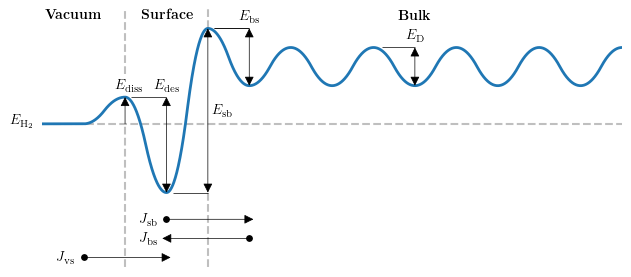

In [4]:
import numpy as np
import matplotx
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from pyenergydiagrams import State, Diagram

params = {
    "text.usetex": True,
    "font.size": 8,
    "font.family": "Times New Roman",
}
plt.rcParams.update(params)


class CustomDiagram(Diagram):
    def make_x_y_raw(self):
        x_raw, y_raw = [], []
        eps = 0.001
        for i, state in enumerate(self.states):
            x_raw += [i + j * eps for j in range(state.copies)]
            y_raw += [state.E] * state.copies
        return x_raw, y_raw

    def make_curve(self, nb_samples=2000):
        f = interp1d(self.x_raw, self.energies, kind="quadratic")

        x_new = np.linspace(min(self.x_raw), max(self.x_raw), nb_samples)
        y_smooth = f(x_new)
        return x_new, y_smooth

    def add_arrow(
        self,
        state1,
        state2,
        text="",
        loc_text="middle-right",
        kwargs_arrow={},
        kwargs_text={},
    ):
        # arrow
        plt.annotate(
            text="",
            xy=(self.states.index(state1), state1.E),
            xytext=(self.states.index(state1), state2.E),
            arrowprops=dict(
                arrowstyle="<|-|>", color="black", lw=0.5, shrinkA=0, shrinkB=0
            ),
            **kwargs_arrow
        )

        if loc_text == "middle-right":
            xytext = (self.states.index(state1) + 0.1, (state1.E + state2.E) / 2)
            ha = "left"
        elif loc_text == "middle-left":
            xytext = (self.states.index(state1) - 0.1, (state1.E + state2.E) / 2)
            ha = "right"
        elif loc_text == "top":
            xytext = (
                self.states.index(state1),
                (state1.E + state2.E) / 2 + abs(state1.E - state2.E) / 2 + 0.3,
            )
            ha = "center"
        elif loc_text == "bottom":
            xytext = (
                self.states.index(state1),
                (state1.E + state2.E) / 2 - abs(state1.E - state2.E) / 2 - 0.2,
            )
            ha = "center"

        # text
        plt.annotate(
            text=text, xy=xytext, ha=ha, va="center", fontsize=10, **kwargs_text
        )

    def add_line(self, state, dx_left=0, dx_right=0, linestyles="solid", **kwargs):
        index = self.states.index(state)
        plt.hlines(
            y=state.E,
            xmin=index - dx_left,
            xmax=index + dx_right,
            linestyles=linestyles,
            **kwargs
        )


def add_transition(x_start, x_end, y, label, direction):
    mult = 1 if direction == "right" else -1
    arrowstyle = "-|>"

    plt.scatter(x=x_start, y=y, marker="o", s=15, color="black")
    plt.annotate(
        text="",
        xy=(x_end + mult * 0.1, y),
        xytext=(x_start, y),
        arrowprops=dict(
            arrowstyle=arrowstyle, color="black", lw=0.5, shrinkA=0, shrinkB=0
        ),
    )
    plt.annotate(
        text=label,
        xy=(min(x_start, x_end) - 0.45, y),
        va="center",
        ha="center",
        color="black",
        fontsize=10,
    )


mm2inch = 0.1 / 2.54
plt.figure(figsize=(190 * mm2inch, 85 * mm2inch))

energies = [-0.5, -0.5, 0.2, -2.3, 2.0, *[0.5, 1.5] * 5]

states = [State(E=E) for E in energies]

adsorption_site = states[3]
first_solution_site = states[5]

my_diagram = CustomDiagram(states)

with plt.style.context(matplotx.styles.dufte):
    plt.plot(my_diagram.x, my_diagram.y, color="tab:blue", lw=2)

    my_diagram.add_line(
        states[8], dx_left=-0.2, dx_right=1, linestyles="solid", color="black", lw=0.5
    )
    my_diagram.add_arrow(
        states[9],
        states[10],
        "$E_\mathrm{D}$",
        loc_text="top",
        kwargs_text={"color": "black"},
    )

    my_diagram.add_line(
        states[states.index(first_solution_site) - 1],
        dx_left=-0.15,
        dx_right=1,
        linestyles="solid",
        color="black",
        lw=0.5,
    )
    my_diagram.add_arrow(
        first_solution_site,
        states[states.index(first_solution_site) - 1],
        "$E_{\mathrm{bs}}$",
        loc_text="top",
        kwargs_text={"color": "black"},
    )

    my_diagram.add_line(
        adsorption_site,
        dx_left=-0.15,
        dx_right=1,
        linestyles="solid",
        color="black",
        lw=0.5,
    )
    my_diagram.add_arrow(
        states[states.index(first_solution_site) - 1],
        adsorption_site,
        "$E_{\mathrm{sb}}$",
        loc_text="middle-right",
        kwargs_text={"color": "black"},
    )

    my_diagram.add_line(
        states[states.index(first_solution_site) - 1],
        dx_left=-0.15,
        dx_right=1,
        linestyles="solid",
        color="black",
        lw=0.5,
    )

    my_diagram.add_arrow(
        adsorption_site,
        states[states.index(adsorption_site) - 1],
        "$E_\mathrm{des}$",
        loc_text="top",
        kwargs_text={"color": "black"},
    )

    my_diagram.add_line(
        states[states.index(adsorption_site) - 1],
        dx_left=-0.15,
        dx_right=1,
        linestyles="solid",
        color="black",
        lw=0.5,
    )

    plt.plot(
        [min(my_diagram.x), max(my_diagram.x)],
        [-0.5, -0.5],
        ls="dashed",
        color="grey",
        alpha=0.5,
        zorder=0,
        lw=1.5,
    )

    plt.plot(
        [states.index(adsorption_site) - 1, states.index(adsorption_site) - 1],
        [-5, states[0].E],
        ls="dashed",
        color="grey",
        alpha=0.5,
        zorder=0,
        lw=1.5,
    )

    plt.plot(
        [states.index(adsorption_site) - 1, states.index(adsorption_site) - 1],
        [states[2].E + 0.6, 2.5],
        ls="dashed",
        color="grey",
        alpha=0.5,
        zorder=0,
        lw=1.5,
    )

    plt.plot(
        [states.index(first_solution_site) - 1, states.index(first_solution_site) - 1],
        [-5, energies[states.index(first_solution_site) - 2]],
        ls="dashed",
        color="grey",
        alpha=0.5,
        zorder=0,
        lw=1.5,
    )

    plt.plot(
        [states.index(first_solution_site) - 1, states.index(first_solution_site) - 1],
        [energies[states.index(first_solution_site) - 1], 2.5],
        ls="dashed",
        color="grey",
        alpha=0.5,
        zorder=0,
        lw=1.5,
    )

    plt.annotate(
        text="",
        xy=(states.index(adsorption_site) - 1, states[0].E),
        xytext=(states.index(adsorption_site) - 1, states[2].E),
        arrowprops=dict(arrowstyle="<|-", color="black", lw=0.5, shrinkA=0, shrinkB=0),
    )

    plt.annotate(
        text=r"$E_\mathrm{diss}$",
        xy=(
            states.index(adsorption_site) - 1 + 0.1,
            (states[1].E + states[2].E) / 2 + abs(states[1].E - states[2].E) / 2 + 0.3,
        ),
        ha="center",
        va="center",
        fontsize=10,
        color="black",
    )

    font = {"color": "black", "fontsize": 10}
    kwargs = {"ha": "center"}
    plt.text(x=0.75, y=2.25, s=r"\bf{Vacuum}", fontdict=font, **kwargs)

    plt.text(x=3, y=2.25, s=r"\bf{Surface}", fontdict=font, **kwargs)

    plt.text(x=9, y=2.25, s=r"\bf{Bulk}", fontdict=font, **kwargs)

    plt.text(x=-0.5, y=-0.5, s=r"$E_{\mathrm{H}_2}$", fontdict=font, **kwargs)

    add_transition(1, 3, -4.0, r"$J_\mathrm{vs}$", "right")
    add_transition(5, 3, -3.5, r"$J_\mathrm{bs}$", "left")
    add_transition(3, 5, -3.0, r"$J_\mathrm{sb}$", "right")

    plt.ylim(-4.25, 2.5)
    plt.xticks([])
    plt.yticks([])

    # plt.savefig("potential_diagram.pdf", dpi=1000, bbox_inches="tight", pad_inches=0.05)
    plt.show()